In [ ]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
data[row_has_NaN]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
import seaborn as sns

In [ ]:
corr = data.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
import matplotlib.pyplot as plt

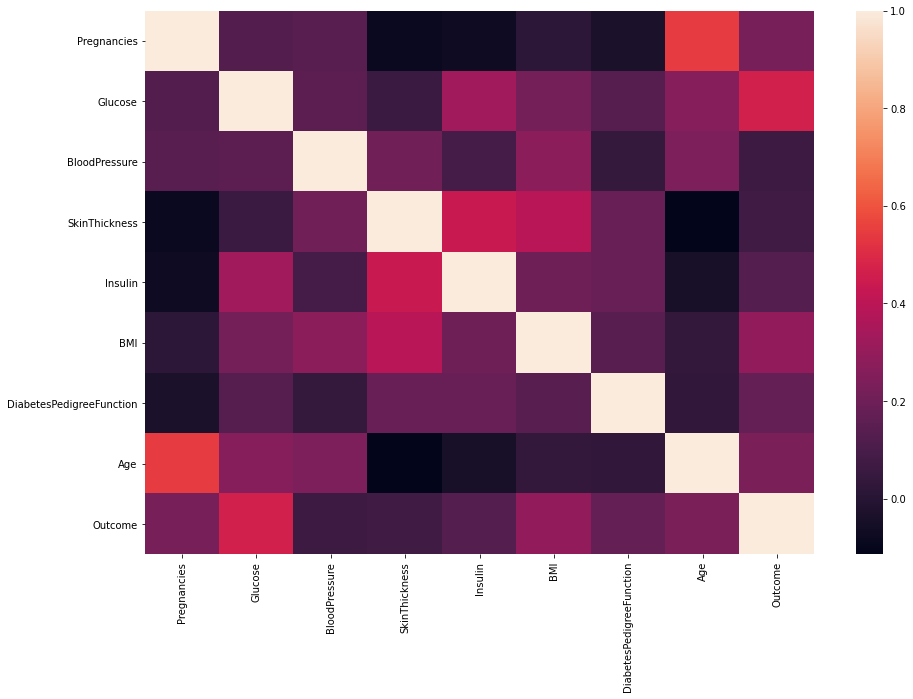

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr)

| First                   | second        | cor |
|-------------------------|---------------|-----|
|outcome                  | glucose       | 0.4 |
|Age                      | pregnancies   | 0.6 |
|DiabetesPedigreeFunction | X             | X   |
|BMI                      | SkinThickness | 0.3 |
|Insulin                  | SkinThickness | 0.4 |
|SkinThickness            | X             | X   |
|BloodPressure            | X             | X   |
|Glucose                  | X             | X   |




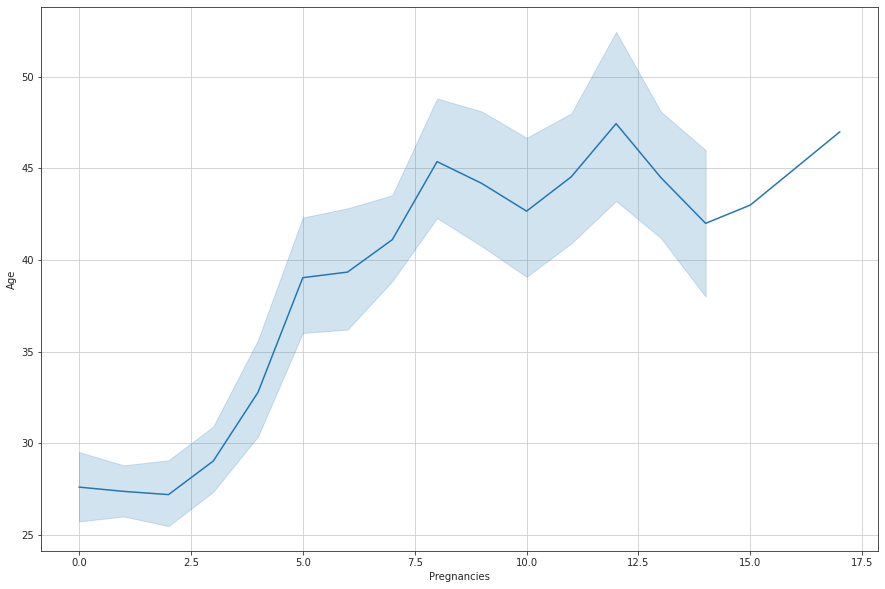

In [ ]:
plt.figure(figsize=(15, 10))
sns.set_style("ticks",{'axes.grid' : True})
sns.lineplot(data=data, x="Pregnancies", y="Age")

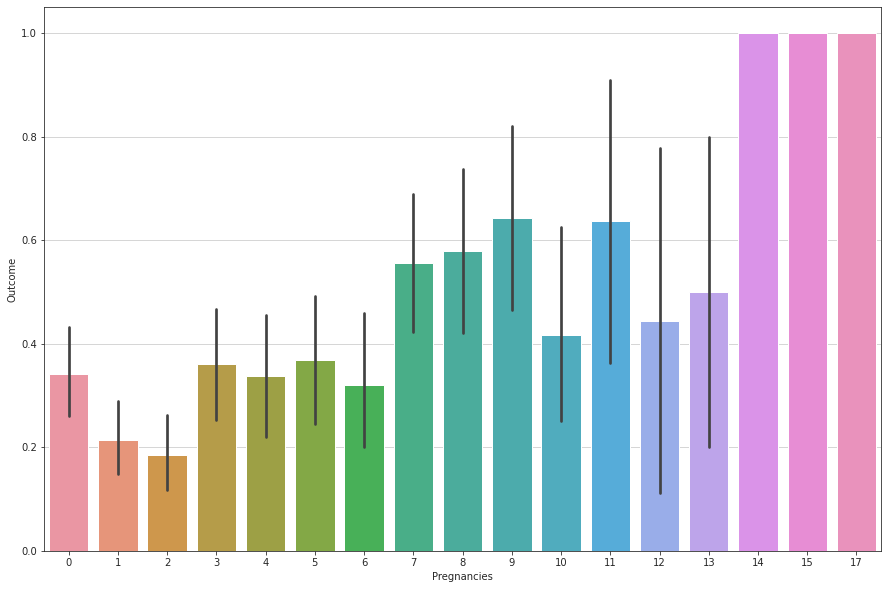

In [ ]:
plt.figure(figsize=(15, 10))
sns.set_style("ticks",{'axes.grid' : True})
sns.barplot(data=data, y="Outcome", x="Pregnancies")

# info

* ~ 47 years people can get easily diabetes when have many pregnancies
* diabetes are corelated with pregnancies and age

[(pt-br) info website](https://www.tuasaude.com/diabetes-gestacional/) 

In [ ]:
temp1 = data[data["Outcome"] == 1]
temp0 = data[data["Outcome"] == 0]

In [ ]:
temp1["count"] = 0
temp1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,count
0,6,148,72,35,0,33.6,0.627,50,1,0
2,8,183,64,0,0,23.3,0.672,32,1,0
4,0,137,40,35,168,43.1,2.288,33,1,0
6,3,78,50,32,88,31.0,0.248,26,1,0
8,2,197,70,45,543,30.5,0.158,53,1,0


In [49]:
temp1["count_age"] = 0
temp1.head()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,count,count_age
0,0,6,148,72,35,0,33.6,0.627,50,1,16,0
1,2,8,183,64,0,0,23.3,0.672,32,1,22,0
2,4,0,137,40,35,168,43.1,2.288,33,1,38,0
3,6,3,78,50,32,88,31.0,0.248,26,1,27,0
4,8,2,197,70,45,543,30.5,0.158,53,1,19,0


In [52]:
counters = temp1["Age"].value_counts()
counters

25    14
31    13
29    13
41    13
43    11
22    11
38    10
28    10
36    10
33    10
32     9
45     8
24     8
27     8
26     8
23     7
42     7
46     7
52     7
30     6
37     6
40     6
35     5
21     5
50     5
51     5
44     5
54     4
47     4
34     4
53     4
39     3
49     3
58     3
60     2
66     2
62     2
56     2
59     2
61     1
67     1
57     1
55     1
48     1
70     1
Name: Age, dtype: int64

In [58]:
counters2 = temp1["Pregnancies"].value_counts()
counters2

0     38
1     29
3     27
7     25
4     23
8     22
5     21
2     19
9     18
6     16
10    10
11     7
13     5
12     4
14     2
15     1
17     1
Name: Pregnancies, dtype: int64

In [40]:
temp1 = temp1.reset_index()

In [42]:
for i in range(len(temp1)):
  temp1["count"][i] =  counters2[temp1["Pregnancies"][i]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
for i in range(len(temp1)):
  temp1["count_age"][i] =  counters[temp1["Age"][i]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
temp1.head()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,count,count_age
0,0,6,148,72,35,0,33.6,0.627,50,1,16,5
1,2,8,183,64,0,0,23.3,0.672,32,1,22,9
2,4,0,137,40,35,168,43.1,2.288,33,1,38,10
3,6,3,78,50,32,88,31.0,0.248,26,1,27,8
4,8,2,197,70,45,543,30.5,0.158,53,1,19,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


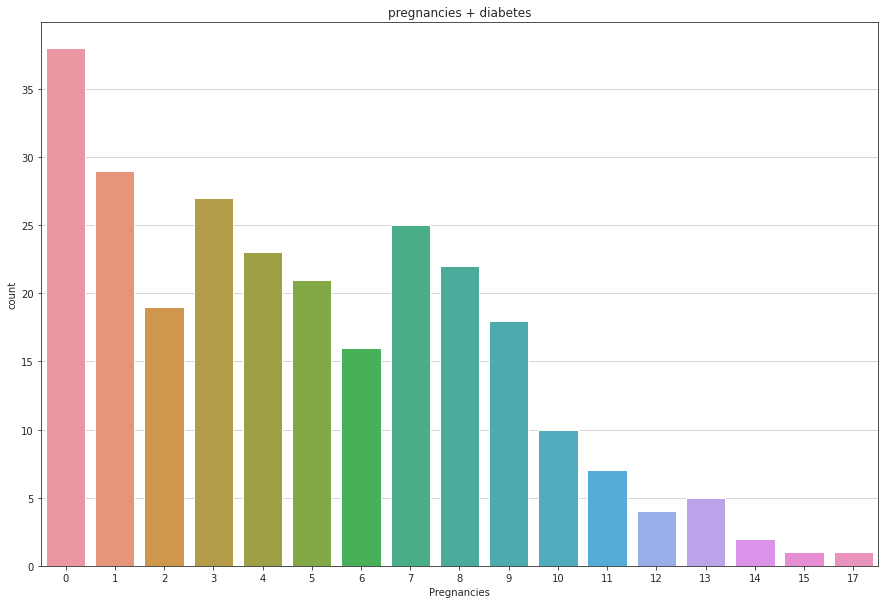

In [48]:
plt.figure(figsize=(15, 10))
plt.title("pregnancies + diabetes")
sns.barplot(temp1["Pregnancies"], temp1["count"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


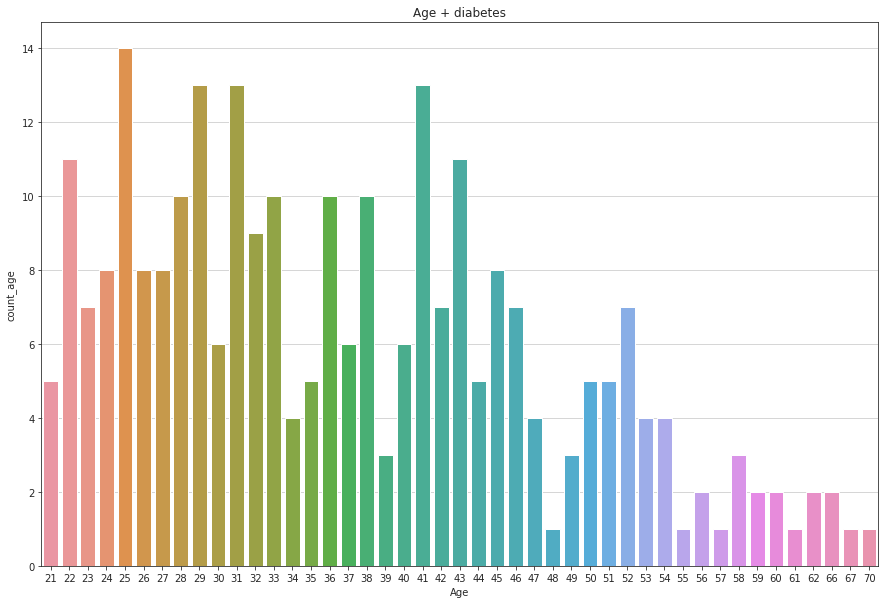

In [55]:
plt.figure(figsize=(15, 10))
plt.title("Age + diabetes")
sns.barplot(temp1["Age"], temp1["count_age"])

# Idea
 * has more people with less pregnancies with diabetes
 * has more people with diabetes from 25 - 45 years old

In [57]:
print(f'dataset len --> people with diabetes {len(temp1)} --> people without diabetes {len(temp0)}')

dataset len --> people with diabetes 268 --> people without diabetes 500


In [63]:
temp0["count"] = 0
temp0["count_age"] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
counters3 = temp0["Age"].value_counts()
counters3

22    61
21    58
24    38
25    34
23    31
26    25
28    25
27    24
29    16
30    15
37    13
31    11
42    11
34    10
39     9
41     9
32     7
33     7
45     7
40     7
36     6
38     6
46     6
35     5
48     4
63     4
58     4
57     4
51     3
55     3
44     3
50     3
60     3
65     3
43     2
69     2
54     2
67     2
47     2
49     2
66     2
62     2
64     1
68     1
59     1
72     1
61     1
56     1
53     1
52     1
81     1
Name: Age, dtype: int64

In [75]:
counters4 = temp0["Pregnancies"].value_counts()
counters4

1     106
2      84
0      73
3      48
4      45
5      36
6      34
7      20
8      16
10     14
9      10
13      5
12      5
11      4
Name: Pregnancies, dtype: int64

In [76]:
temp0 = temp0.reset_index()

In [77]:
temp0

,level_0,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,count,count_age
0,0,1,1,85,66,29,0,26.6,0.351,31,0,0,0
1,1,3,1,89,66,23,94,28.1,0.167,21,0,0,0
2,2,5,5,116,74,0,0,25.6,0.201,30,0,0,0
3,3,7,10,115,0,0,0,35.3,0.134,29,0,0,0
4,4,10,4,110,92,0,0,37.6,0.191,30,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,762,9,89,62,0,0,22.5,0.142,33,0,0,0
496,496,763,10,101,76,48,180,32.9,0.171,63,0,0,0
497,497,764,2,122,70,27,0,36.8,0.340,27,0,0,0
498,498,765,5,121,72,23,112,26.2,0.245,30,0,0,0


In [80]:
for i in range(len(temp0)):
  temp0["count"][i] =  counters4[temp0["Pregnancies"][i]]
for i in range(len(temp0)):
  temp0["count_age"][i] =  counters3[temp0["Age"][i]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


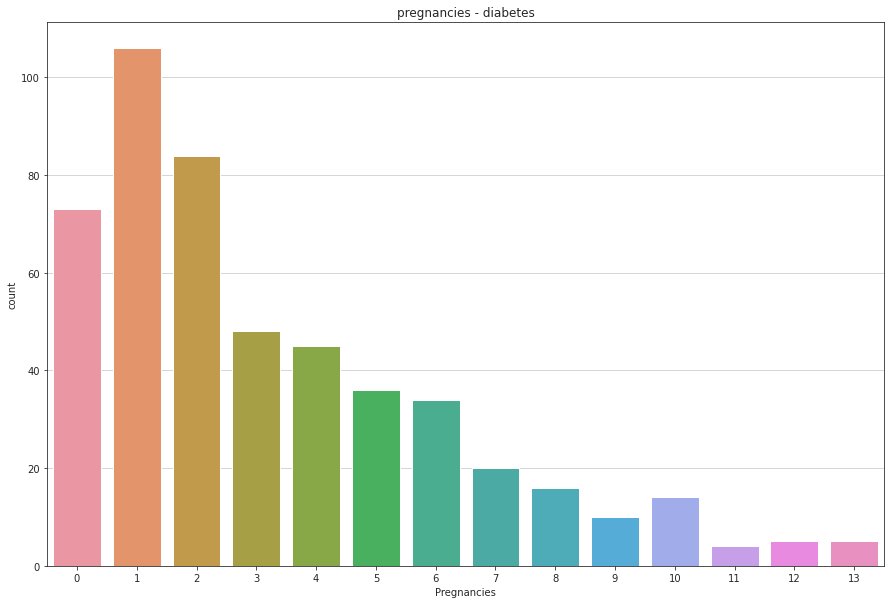

In [81]:
plt.figure(figsize=(15, 10))
plt.title("pregnancies - diabetes")
sns.barplot(temp0["Pregnancies"], temp0["count"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


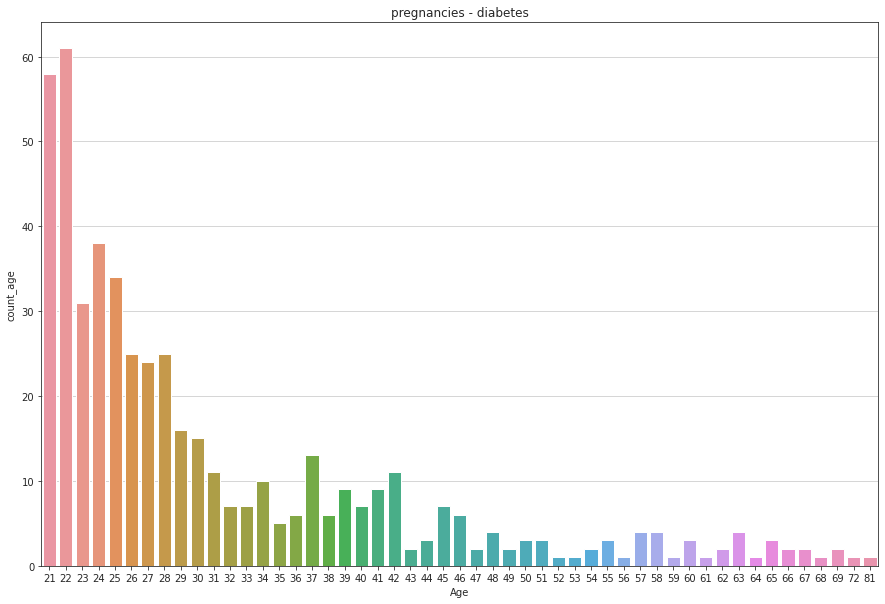

In [83]:
plt.figure(figsize=(15, 10))
plt.title("pregnancies - diabetes")
sns.barplot(temp0["Age"], temp0["count_age"])

In [85]:
pregnancies = counters4.add(counters2,fill_value=0)
ages = counters3.add(counters, fill_value=0)

In [88]:
ages.index.to_numpy()

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72,
       81])

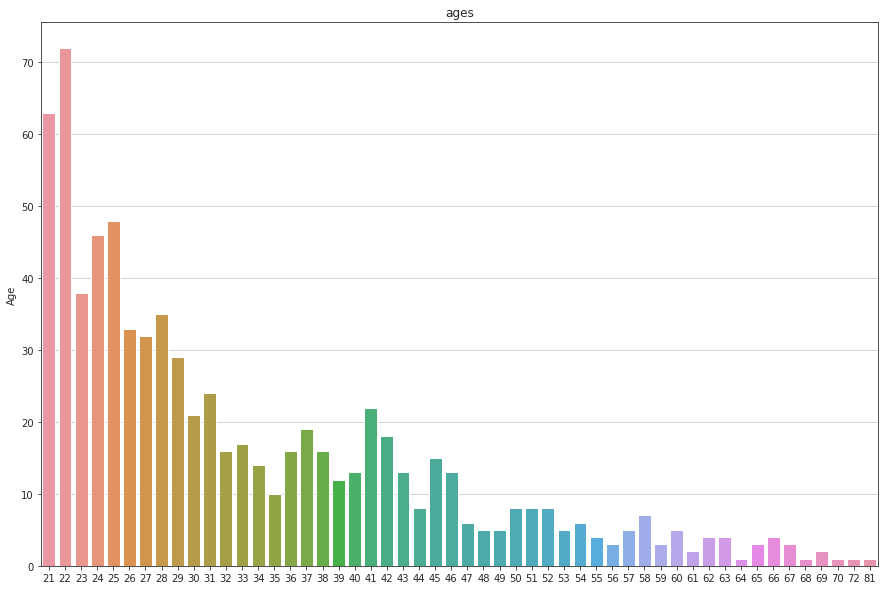

In [90]:
plt.figure(figsize=(15, 10))
plt.title("ages")
sns.barplot(x=ages.index.to_numpy(), y=ages)

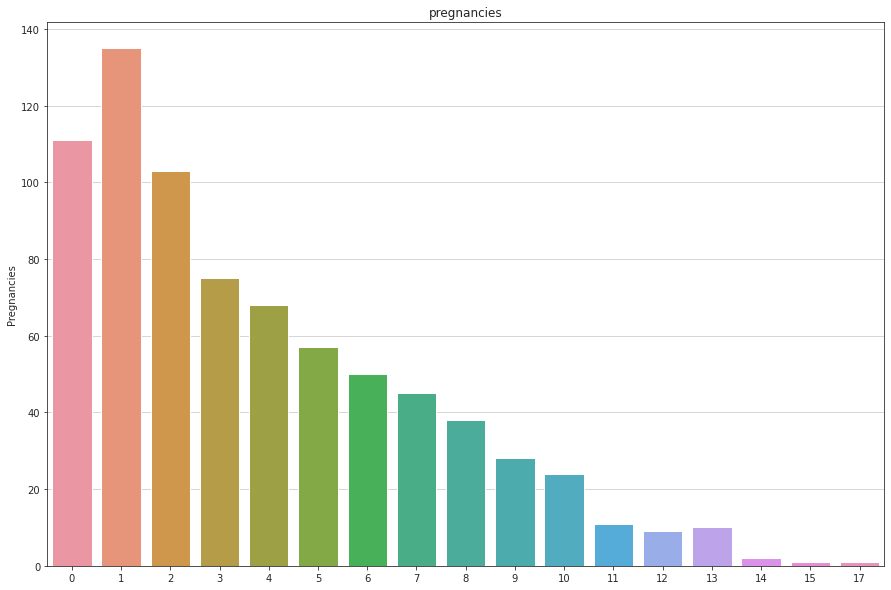

In [91]:
plt.figure(figsize=(15, 10))
plt.title("pregnancies")
sns.barplot(x=pregnancies.index.to_numpy(), y=pregnancies)

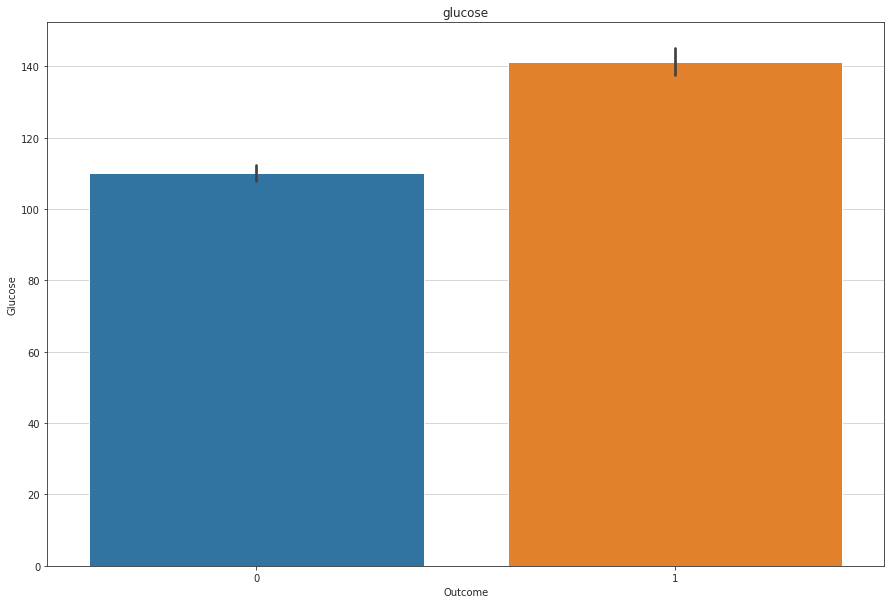

In [92]:
plt.figure(figsize=(15, 10))
plt.title("glucose")
sns.barplot(x=data["Outcome"], y=data["Glucose"])

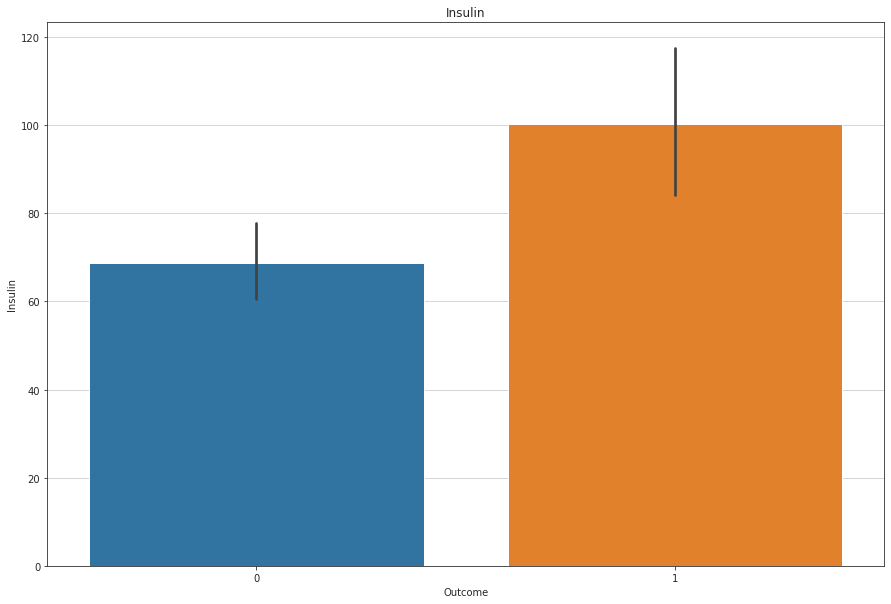

In [94]:
plt.figure(figsize=(15, 10))
plt.title("Insulin")
sns.barplot(x=data["Outcome"], y=data["Insulin"])

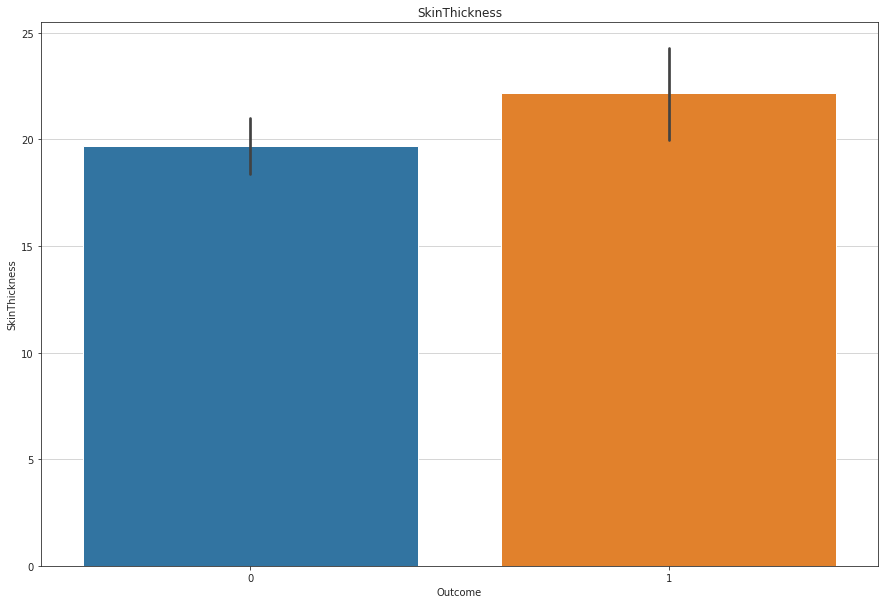

In [96]:
plt.figure(figsize=(15, 10))
plt.title("SkinThickness")
sns.barplot(x=data["Outcome"], y=data["SkinThickness"])

# After some analysis, the conclusion is: this dataset has few data, and this data has a slanting content with so much people with less age and less pregnancies than people with more age and more pregnancies, therefore this data can't be used in a real case, but for train, this is a good one to test your skills. To finish, I will make a model with scikit-learn. 

In [97]:
features = ["Age", "Pregnancies", "BMI", "SkinThickness", "Insulin", "Glucose"]

In [98]:
label = data.Outcome

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( data[features], label, test_size=0.33, random_state=42)

In [100]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

model.fit(X_train,y_train)

prevision = model.predict(X_test)

In [103]:
(y_test == prevision).value_counts()

True     186
False     68
Name: Outcome, dtype: int64

In [108]:
from sklearn import metrics
from math import trunc
print(f"Accuracy: ~{ trunc(metrics.accuracy_score(y_test, prevision) * 100)}%")

Accuracy: ~73%
